In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:16px;}
</style>
"""))

<b><font color="red" size="6">ch11. N차원 배열 다루기</font></b>
# 4절. 복사와 뷰
## 4.1 할당

In [5]:
# 스칼라 변수
a = 10
b = a
print('a와 b주소 :', id(a), id(b))
b = 99
print('수정후 a와 b주소 :', id(a), id(b))
print('수정후 a와 b 데이터 :', a, b)

a와 b주소 : 2024123597328 2024123597328
수정후 a와 b주소 : 2024123597328 2024123600176
수정후 a와 b 데이터 : 10 99


In [23]:
# 배열
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [24]:
b = a

In [25]:
a.shape, type(a), a.ndim, id(a)

((12,), numpy.ndarray, 1, 2024274836336)

In [26]:
b.shape, type(b), b.ndim, id(b)

((12,), numpy.ndarray, 1, 2024274836336)

In [27]:
a is b 

True

In [28]:
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [39]:
np.all(a==b)

True

In [30]:
b.shape = (3,4)

In [31]:
a.shape, type(a), a.ndim, id(a)

((3, 4), numpy.ndarray, 2, 2024274836336)

## 4.2 뷰(View) : 얕은 복사

In [32]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [33]:
c = a.view()
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [36]:
c==a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [40]:
np.all(c==a)

True

In [41]:
c is a

False

In [42]:
c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [43]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [44]:
# 배열 c의 특정 요소만 변경(1행의 짝수번째 열 변경)
c[1, ::2] = -9
c

array([[ 0,  1,  2,  3,  4,  5],
       [-9,  7, -9,  9, -9, 11]])

In [45]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5, -9,  7],
       [-9,  9, -9, 11]])

In [48]:
# 슬라이싱이 될 때 뷰가 반환됨
a = np.array([[1, 85, 2015, 5000],
              [1, 102, 2015, 5500],
              [2, 45, 2016, 4900],])
a

array([[   1,   85, 2015, 5000],
       [   1,  102, 2015, 5500],
       [   2,   45, 2016, 4900]])

In [49]:
X = a[:, :-1] # 독립변수를 슬라이싱해서 X대입 : 슬라이싱될 때 뷰가 반환
X

array([[   1,   85, 2015],
       [   1,  102, 2015],
       [   2,   45, 2016]])

In [53]:
X[0:2, -1] = 1
X[-1, -1] = 2
X

array([[  1,  85,   1],
       [  1, 102,   1],
       [  2,  45,   2]])

In [54]:
a

array([[   1,   85,    1, 5000],
       [   1,  102,    1, 5500],
       [   2,   45,    2, 4900]])

## 4.3 깊은 복사

In [55]:
# 슬라이싱이 될 때 뷰가 반환됨
a = np.array([[1, 85, 2015, 5000],
              [1, 102, 2015, 5500],
              [2, 45, 2016, 4900],])
a

array([[   1,   85, 2015, 5000],
       [   1,  102, 2015, 5500],
       [   2,   45, 2016, 4900]])

In [57]:
# X = a[:, :-1] # 얕은 복사(View 생성)
X = a[:, :-1].copy() #깊은 복사
X

array([[   1,   85, 2015],
       [   1,  102, 2015],
       [   2,   45, 2016]])

In [58]:
X[:, 0:-1] = 1
X[-1, -1] = 2
X

array([[   1,    1, 2015],
       [   1,    1, 2015],
       [   1,    1,    2]])

In [59]:
a

array([[   1,   85, 2015, 5000],
       [   1,  102, 2015, 5500],
       [   2,   45, 2016, 4900]])

# 5절. 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [60]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [63]:
a[ [0, 5, 9] ]

array([ 0, 25, 81])

In [64]:
# 인덱싱하기 위한 값을 배열로 만듦
i = np.array([0, 0, 5, 9])
a[i] # 결과는 i(인덱싱 배열)의 형태로 따라감

array([ 0,  0, 25, 81])

In [65]:
# 인덱싱하기 위한 값을 배열로 만듦
j = np.array([[0, 1],
              [1, 5]])
a[j]

array([[ 0,  1],
       [ 1, 25]])

In [66]:
a[j] += 100
a

array([100, 101,   4,   9,  16, 125,  36,  49,  64,  81, 100, 121])

In [69]:
                #    R G B
palette = np.array([[0,0,0], # black
                    [255,0,0], # red
                    [0,255,0], # green
                    [0,0,255], # blue
                    [255,255,255] ]) # white

In [70]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 

In [71]:
image_data.shape

(10, 10, 3)

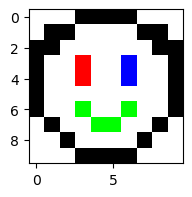

In [73]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.show()

In [ ]:
# 나중에 학습할 이미지 데이터

In [74]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [80]:
import tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()

In [83]:
mnist[0][0].shape # 독립변수가 될 이미지들 60000

(60000, 28, 28)

In [84]:
mnist[0][1] # 종속변수

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [85]:
X = mnist[0][0]
Y = mnist[0][1]

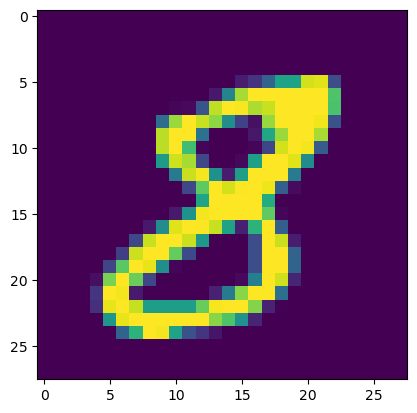

In [94]:
plt.imshow(X[57217])
plt.show()

In [95]:
Y[57217]

8

## 5.2 argmax : 최대값이 있는 인덱스

In [97]:
import numpy as np
data = np.sin(np.arange(20).reshape(5,4))
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [98]:
ind = data.argmax(axis=0) # 각 열별 큰값이 있는 index
ind

array([2, 0, 3, 1], dtype=int64)

In [100]:
# 0열에서의 최대값, 1열에서의 최대값, 2열에서의 최대값
data[ind[0],0], data[ind[1],1]

(0.9893582466233818, 0.8414709848078965)

In [101]:
data.shape

(5, 4)

In [106]:
data_col_max = data[ind, range(data.shape[1]) ]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [109]:
np.all(data_col_max == data.max(axis=0))

True

## 5.3 논리 배열을 이용한 인덱싱

In [110]:
a = np.arange(20).reshape(2, 10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [115]:
a[a%2==0] # 논리 배열을 이용한 인덱싱시 True 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [116]:
a[a>15]

array([16, 17, 18, 19])

# 6절. 선형대수
- 2차원 넘파이 배열을 행렬
    * 행렬곱 : @, np.dot()
    * 역행렬 : np.linalg.inv(X)
    * 전치행렬 : X.T, X.transpose()
    * 단위행렬 : np.eye(n) : n행n열 단위행렬

In [117]:
a = np.array([[1,2],
              [3,4]])
a

array([[1, 2],
       [3, 4]])

In [118]:
# a의 역행렬 : a의역행렬@a => 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [119]:
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [120]:
np.eye(2) # 2행2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

In [124]:
np.linalg.inv(a) @ a == np.eye(2)

array([[False, False],
       [ True, False]])

## 6.1. 선형 연립 방정식 풀기(단변량 회귀분석) : 독립변수1, 데이터 2개

In [125]:
x = np.array([2, 4]) # 독립변수
Y = np.array([40,60]) # 종속변수
X = np.dstack( (x, np.ones(len(x)) ))
X

array([[[2., 1.],
        [4., 1.]]])

In [ ]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y

In [127]:
wb = np.linalg.inv(X) @ Y
wb

array([[10., 20.]])

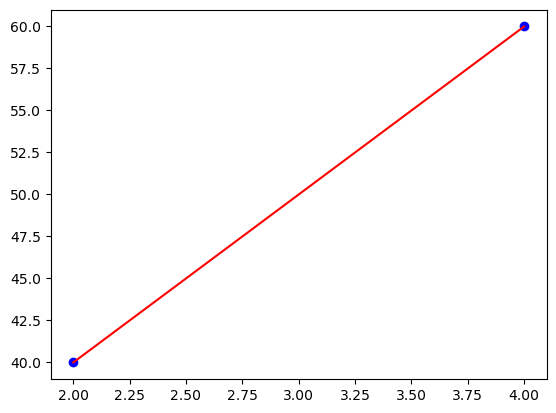

In [129]:
import matplotlib.pyplot as plt
plt.scatter(x, Y, c='b')
plt.plot(x, 10*x+20, color='r')
plt.show()

## 6.2 선형연립방정식 풀기(회귀 분석) : 독립변수1, 데이터n개

In [7]:
import numpy as np
a = np.array([[2, 1],[3,1],[4,1],[5,1]])
a # 정방행렬이 아님

array([[2, 1],
       [3, 1],
       [4, 1],
       [5, 1]])

In [9]:
# 역행렬(정방행렬일 때만 역행렬) 구하는 식
# np.linalg.inv(a)

In [10]:
a.T

array([[2, 3, 4, 5],
       [1, 1, 1, 1]])

In [12]:
a.T @ a # a가 정방행렬이 아니면 전치행렬을 곱해서 정방행렬 만듦

array([[54, 14],
       [14,  4]])

In [15]:
np.linalg.inv(a.T @ a) # a.T @ a 의 역행렬

array([[ 0.2, -0.7],
       [-0.7,  2.7]])

In [16]:
np.linalg.inv(a.T @ a) @ a.T @ a

array([[ 1.00000000e+00,  9.43689571e-16],
       [-2.22044605e-15,  1.00000000e+00]])

In [17]:
x = [32,64,96,118,126,144,152.5,158,] # 독립변수
y = [18,24,61.5,49,52,105,130.3,125]  # 종속변수

In [20]:
X = np.column_stack( [x, np.ones(len(x))] )
print(X)
Y = np.array(y).reshape(-1, 1)
print(Y)

[[ 32.    1. ]
 [ 64.    1. ]
 [ 96.    1. ]
 [118.    1. ]
 [126.    1. ]
 [144.    1. ]
 [152.5   1. ]
 [158.    1. ]]
[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130.3]
 [125. ]]


In [ ]:
# X @ wb   = Y
# X.T @ X @ wb = X.T @ Y
# (X.T @ X )의 역행렬 @ X.T @ X @ wb = (X.T @ X )의 역행렬 @ X.T @ Y

# wb = (X.T @ X )의 역행렬 @ X.T @ Y

In [22]:
wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [29]:
f = wb[0]*x + wb[1] # 회귀분석에서 도출된 가중치로 예측치

In [30]:
print('독립변수 :' ,x)
print('실제값 :', y)
print('예측값 :', f)

독립변수 : [32, 64, 96, 118, 126, 144, 152.5, 158]
실제값 : [18, 24, 61.5, 49, 52, 105, 130.3, 125]
예측값 : [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


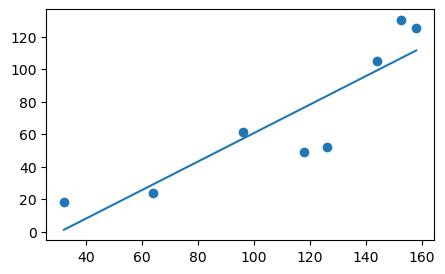

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(x, f, '-') # 회귀식
plt.scatter(x, y)
plt.show()

# 7절. 연습문제

## 실습형

In [40]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
print(iris_data[0]) # 독립변수 0행

[5.1 3.5 1.4 0.2]


In [42]:
print(iris.target) # 종속변수
print(iris.target_names) # 종속변수가 뜻하는 종이름

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [43]:
print(iris.target_names[iris.target]) # 원 데이터의 종속변수

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [44]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [45]:
# 실습형1. 각 변수별 평균 (열별 평균)
np.mean(iris_data, axis=0) # 열별 평균
iris_data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [46]:
# 실습형2. 처음 다섯개 행출력
iris_data[:5] #iris_data[:5,] iris_data[:5,...]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [51]:
# 실습형3. 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력
ex3 = iris_data[:5, :-1]
ex3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [117]:
# 실습형 4. 처음 다섯개 행에서 마지막 열만 출력
ex4 = iris_data[:5,-1]
ex4

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [115]:
# 실습형 5. 3번 배열과 4번 배열을 원래의 모양으로 합치면 (아래의 세 명령어가 같은 결과)
np.c_[ex3,ex4]
np.column_stack((ex3, ex4))
np.hstack((ex3, ex4[:, np.newaxis]))
np.hstack( (ex3, ex4.reshape(-1,1)))

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [55]:
# 실습형6. 처음 다섯 개 행을 이용해서 각 열 별로 평균보다 큰 값들만 출력
iris_sample = iris_data[:5]
iris_sample[iris_sample>np.mean(iris_sample, axis = 0)]

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [66]:
print(iris_sample)
print('열별 평균 :',np.mean(iris_sample, axis = 0))

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
열별 평균 : [4.86 3.28 1.4  0.2 ]


In [112]:
for row in iris_sample:
    for j, item in enumerate(row):
        print(item if item>iris_sample[:,j].mean() \
              else None, end='\t')
    print()

5.1	3.5	None	None	
4.9	None	None	None	
None	None	None	None	
None	None	1.5	None	
5.0	3.6	None	None	


In [126]:
x = iris_sample.copy()
x[x<=np.mean(x, axis=0)] = None
print(x)

[[5.1 3.5 nan nan]
 [4.9 nan nan nan]
 [nan nan nan nan]
 [nan nan 1.5 nan]
 [5.  3.6 nan nan]]


## 문제풀이형

In [73]:
# 문제풀이형1. (3)
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [77]:
print(a.sum(0), a.sum(axis=0)) # 열을 고정하고, 행들끼리 합 (열별합)

[12 15 18 21] [12 15 18 21]


In [127]:
# 문제풀이형2. (3)
#       나머지는 차원이 바뀐 값을 return하여 출력될 뿐 a가 바뀌지 않는다
import numpy as np
a = np.floor(10*np.random.random((3,4)))
a

array([[6., 5., 4., 2.],
       [7., 9., 0., 0.],
       [2., 9., 9., 0.]])

In [129]:
a.ravel() # (1) 차원 배열로 평평하게 펴주는 ravel() flatten() a가 바뀌지 않음
a

array([[6., 5., 4., 2.],
       [7., 9., 0., 0.],
       [2., 9., 9., 0.]])

In [131]:
a.reshape(6,2)
a # (2) 바뀐차원을 return할 뿐 a가 바뀌지 않음

array([[6., 5., 4., 2.],
       [7., 9., 0., 0.],
       [2., 9., 9., 0.]])

In [133]:
a.resize((2,6))
a

array([[6., 5., 4., 2., 7., 9.],
       [0., 0., 2., 9., 9., 0.]])

In [135]:
a.T
a

array([[6., 5., 4., 2., 7., 9.],
       [0., 0., 2., 9., 9., 0.]])

In [1]:
# 문제풀이형3. (1)
import numpy as np
a = np.arange(12).reshape(3,4)
print(a)
a[:2]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [100]:
# 문제풀이형 4. (2)
import numpy as np
a = np.array([1,2,3,4,5])
a[[1,3,4]] = 0
a

array([1, 0, 3, 0, 0])

In [101]:
# 문제풀이형5. (2)
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])
np.c_[a,b]
np.column_stack( [a,b] )
np.hstack((a[:, np.newaxis], b[:, np.newaxis]))
np.dstack( [a,b])
np.stack([a,b], axis=1)
np.stack([a,b], axis=-1)

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])